In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
# Load the dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Basic summary
print("Basic Info:\n")
print(df.info())
print("\n Summary Statistics:\n")
print(df.describe(include='all'))

# Missing values
print("\n Missing Values:\n")
print(df.isnull().sum())



Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

 Summary Statistics:

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000 

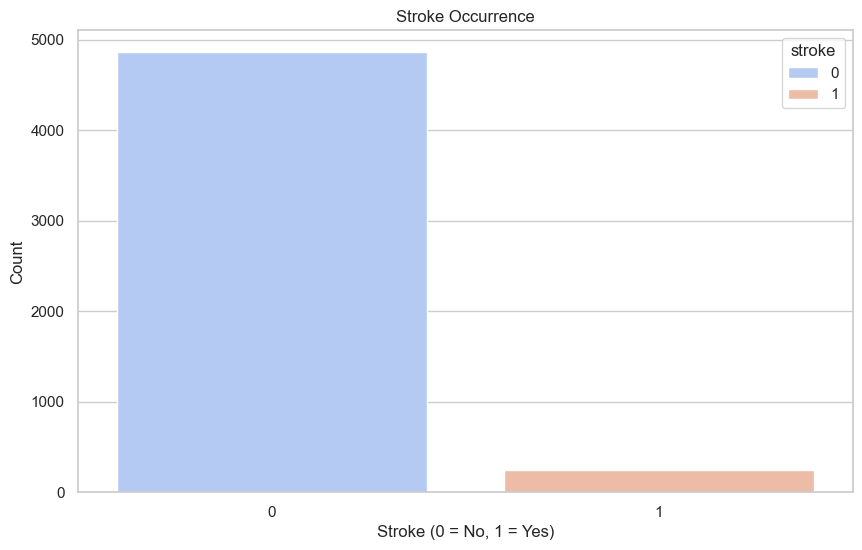

In [57]:
# Target variable distribution
sns.countplot(data=df, x='stroke', hue='stroke',palette='coolwarm')
plt.title('Stroke Occurrence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


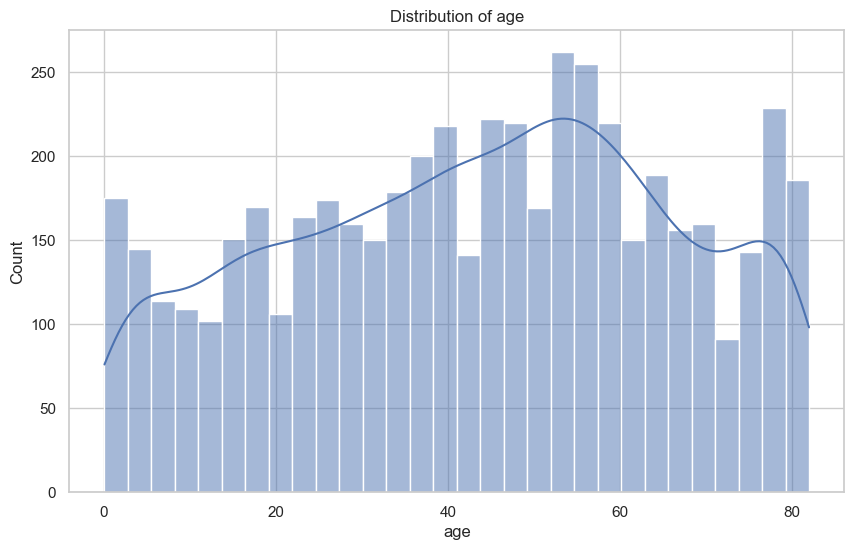

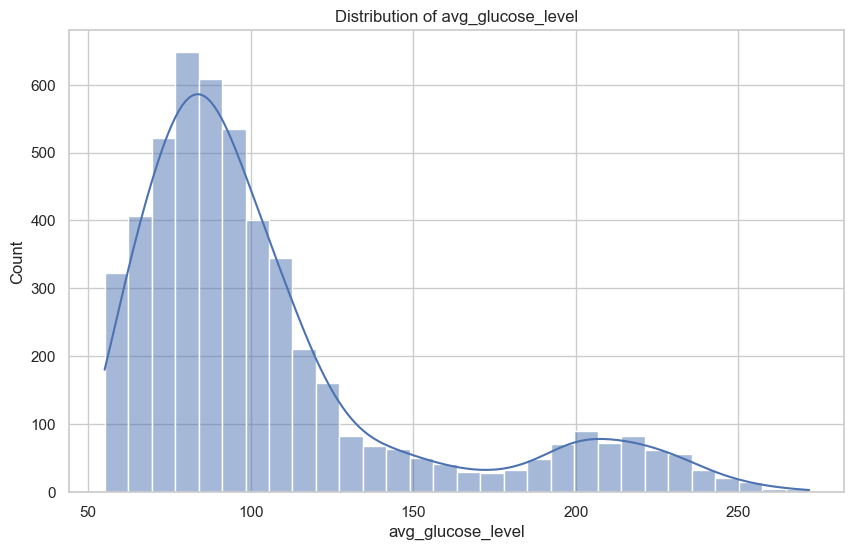

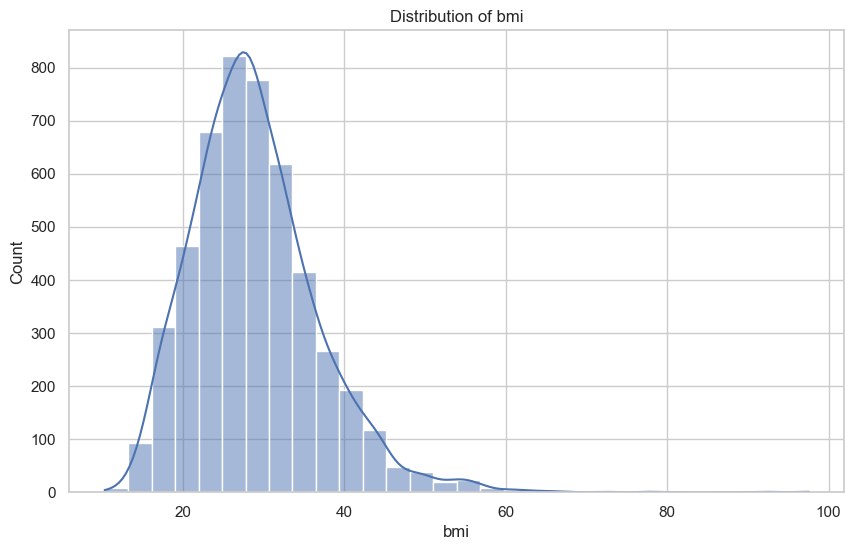

In [58]:
# Distribution of numerical variables
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numeric_cols:
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()



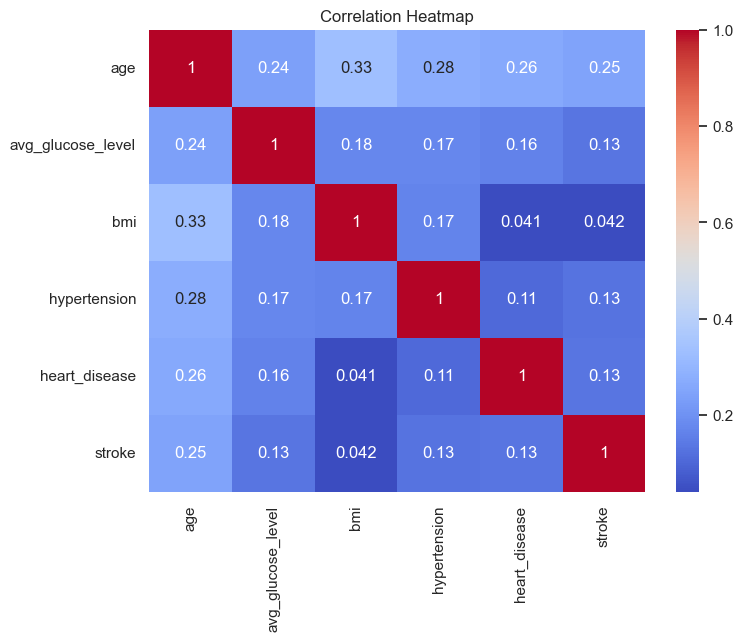

In [59]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols + ['hypertension', 'heart_disease', 'stroke']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


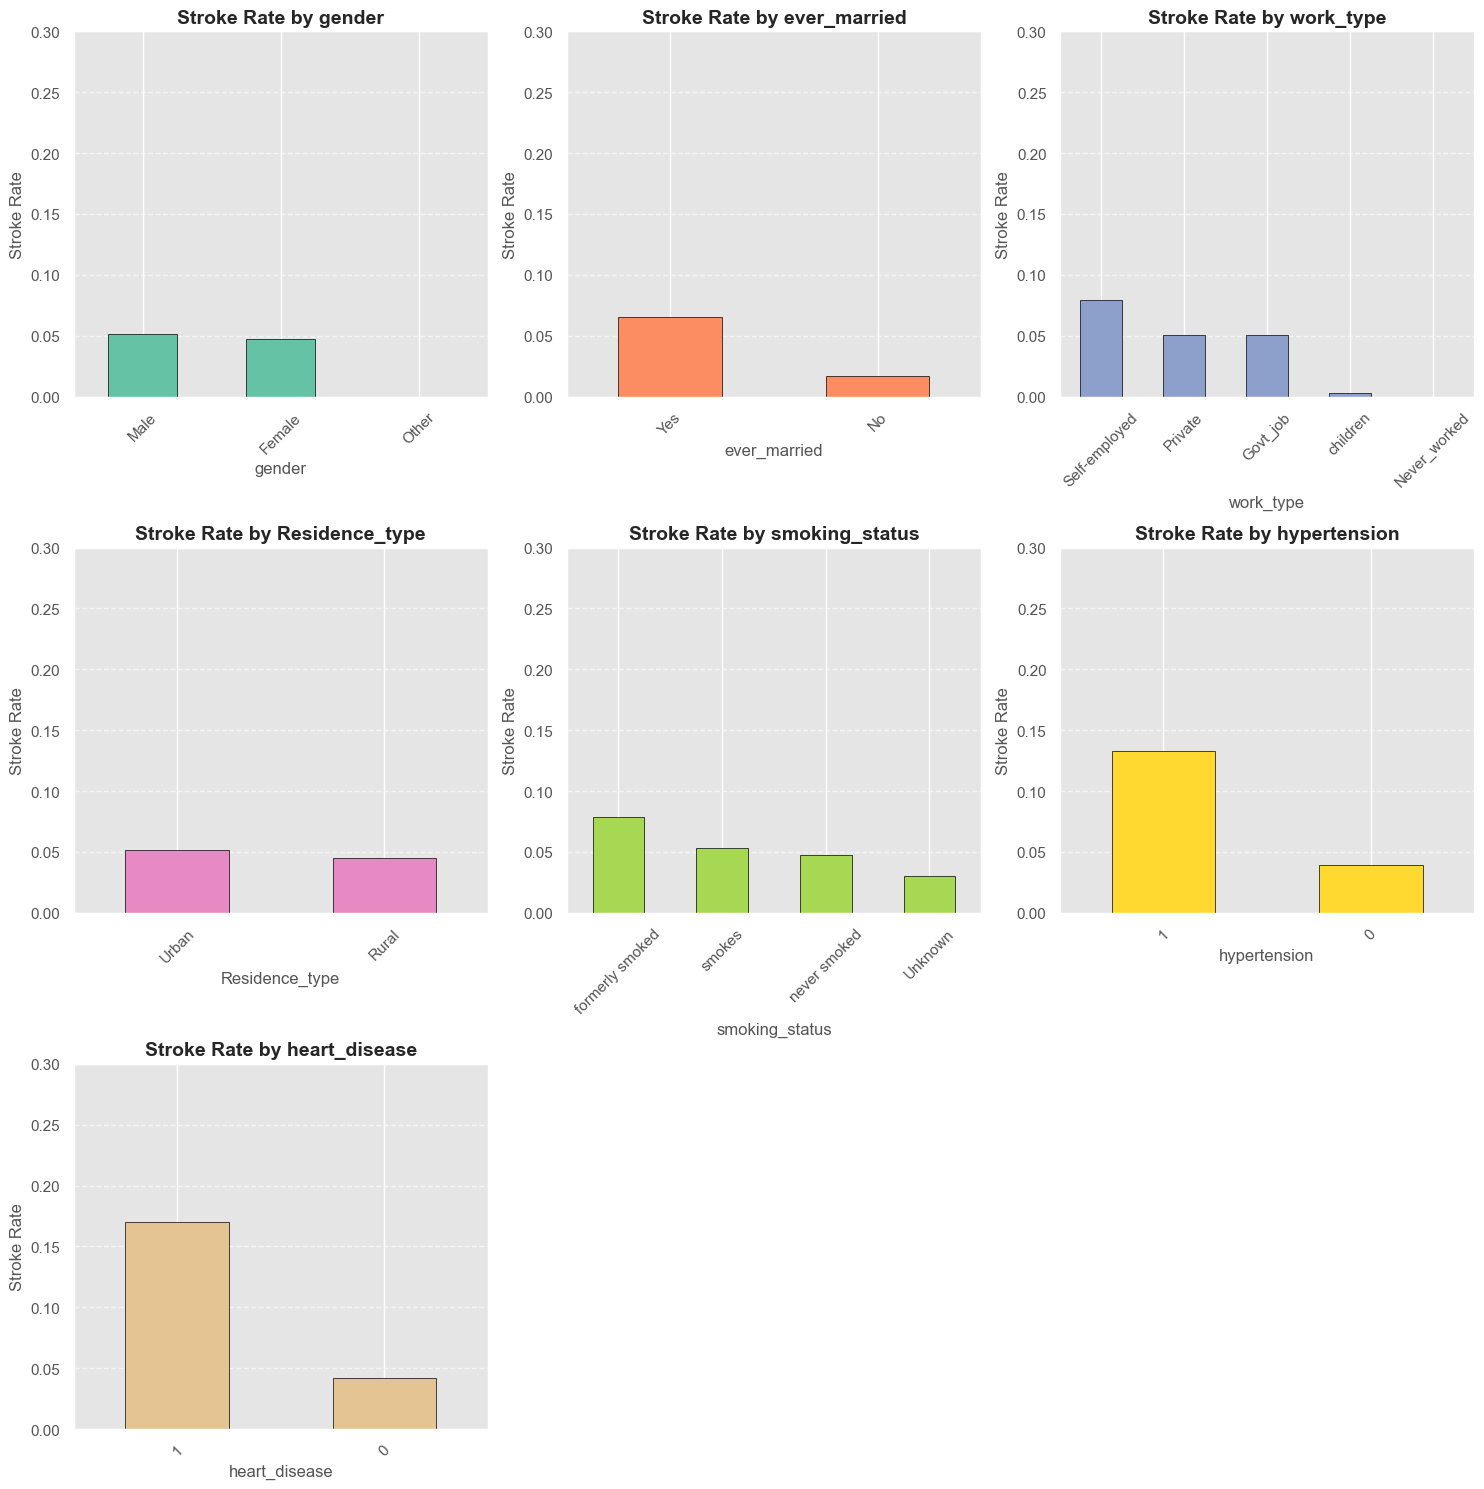

In [60]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5 * math.ceil(len(categorical_features)/3))

palette = sns.color_palette("Set2", len(categorical_features))  # Nice pastel colors

n_features = len(categorical_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    stroke_rate = df.groupby(feature)['stroke'].mean().sort_values(ascending=False) 
    stroke_rate.plot(kind='bar', edgecolor='black', ax=axes[i], color=palette[i])
    axes[i].set_title(f'Stroke Rate by {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Stroke Rate')
    axes[i].set_xlabel(feature)
    axes[i].set_ylim(0, 0.3)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

 
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

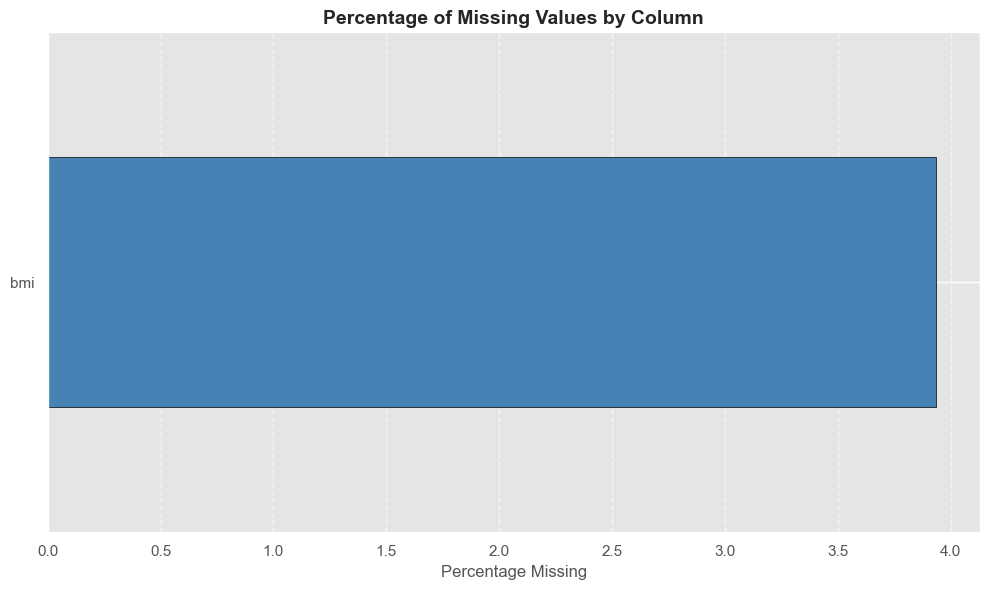

In [61]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # filter only columns with missing values
missing_percent = (missing_counts / len(df)) * 100

missing_percent = missing_percent.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Percentage of Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Percentage Missing')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [62]:
df = df.dropna(subset=['bmi'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [64]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
numeric_features = ['age', 'avg_glucose_level', 'bmi']

X = df[categorical_features + numeric_features]
y = df['stroke']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough' 
)

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.0894
Mean Squared Error: 0.0465


In [70]:
y_pred_class = (y_pred >= 0.5).astype(int)
report = classification_report(y_test, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



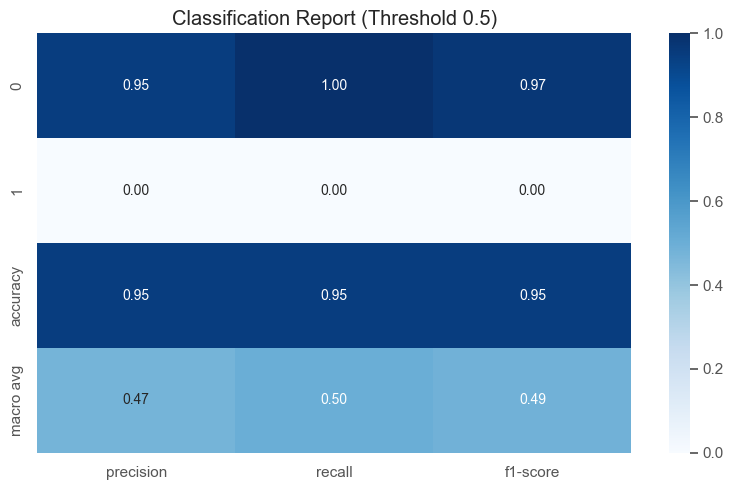

In [71]:
# classification report 
report_dict = classification_report(y_test, y_pred_class, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report (Threshold 0.5)")
plt.tight_layout()
plt.show()
